# Multiple Linear Regression
## Bike-sharing system demand estimation

#### Problem Statement:

BoomBikes aspires to understand the demand for shared bikes among the people after the ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

Essentially, the company wants —


- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands




In [ ]:
!pip install numpy==1.26.4
!pip install pandas==2.1.4
!pip install matplotlib==3.8.0
!pip install seaborn==0.11.0
!pip install scikit-learn==1.2.2
!pip install statsmodels==0.14.0

In [1]:
from IPython.display import Markdown, display

In [2]:
def display_markdown_content(value_to_display):   
    # Create a Markdown formatted string that includes the variable
    markdown_string = f"""**{value_to_display}**"""   
    # Use display() to render the Markdown
    display(Markdown(markdown_string))

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [3]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd

In [5]:
day = pd.read_csv("day.csv")

In [6]:
# Inspecting the data
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
day.shape

(730, 16)

In [8]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


###  Observations from Step-1
- There are no null values in the data set
- Dataset has categorical representatives, with some of them at multiple levels. Hence dummy varibales are to be generated
- Dataset has different column values at different ranges. Hence scaling is required before model building

## Step 2: Visualising the Data

 **Visualising the data by plotting different parameters to understand**.
- If there is some obvious multicollinearity going on
- If some predictors directly have a strong association with the outcome variable

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#### 2a Visualising Numeric Variables

Pairplot from seaborn is used on all the numeric variables

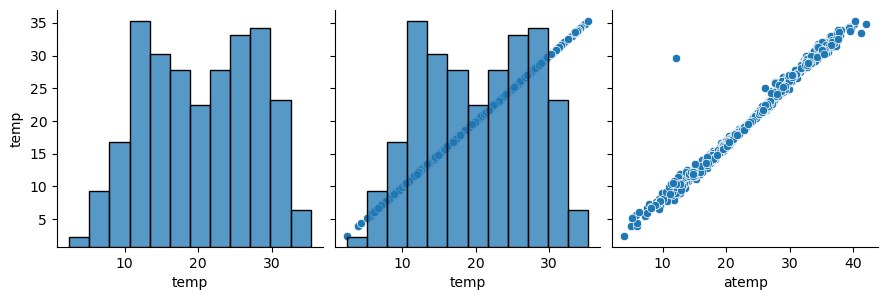

In [11]:
sns.pairplot(day, x_vars=['temp','temp','atemp'], y_vars='temp',size=3, aspect=1, kind='scatter')
plt.show()

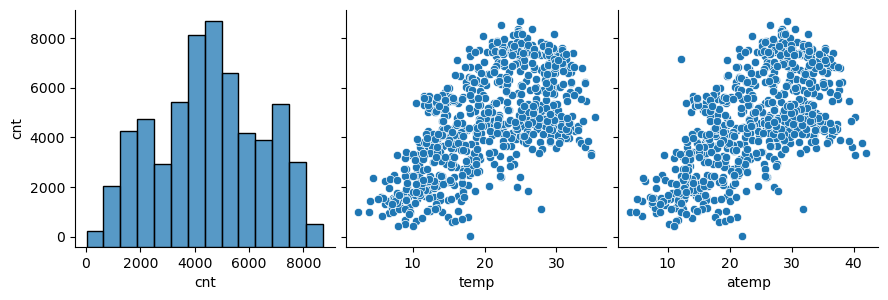

In [12]:
sns.pairplot(day, x_vars=['cnt','temp','atemp'], y_vars='cnt',size=3, aspect=1, kind='scatter')
plt.show()

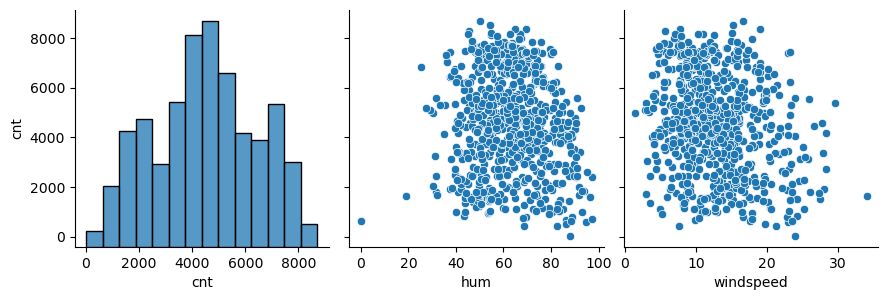

In [13]:
sns.pairplot(day, x_vars=['cnt','hum', 'windspeed'], y_vars='cnt',size=3, aspect=1, kind='scatter')
plt.show()

### Observations from Step-2a
- Temp and aTemp are clearly linearly related. Hence one of these could be potentially insignificant for model building
- Target y i.e. cnt is observed to have monotinic relation with temp. A good indication for a linear regression
- Target y i.e. cnt doesnt seem to have clear relation with Humidity and windspeed. Need to check if combination of these with other parameters have any significance in model building


#### 2b Visualising Categorical Variables
There are a few categorical variables in the data set. Below attempt is to get some understanding on relation ship b/w these categorical variables and the target y variable which is "cnt"

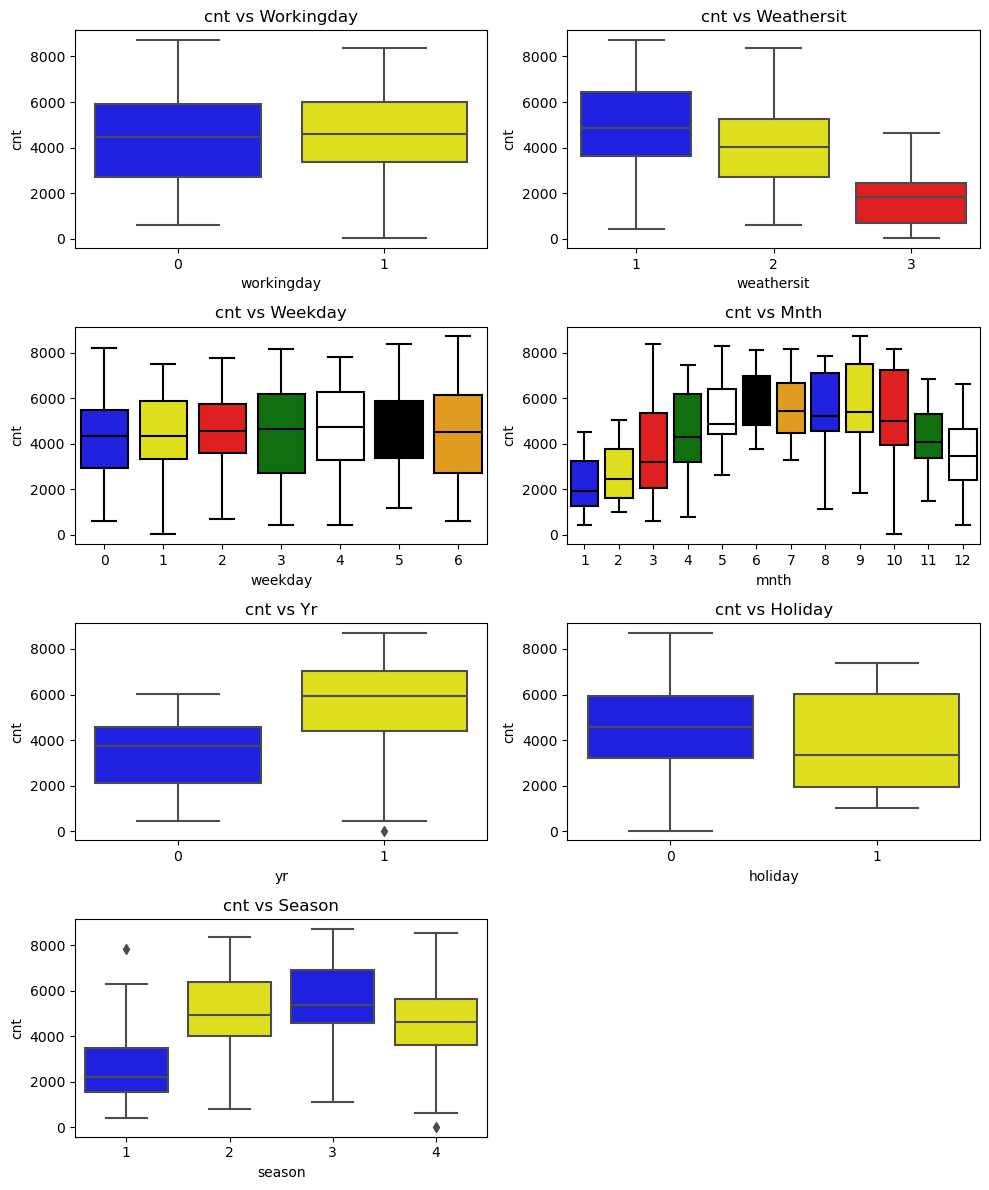

In [14]:
# Colors for each category
colors = {
    'workingday': ['blue', 'yellow'],
    'weathersit': ['blue', 'yellow','red'],
    'weekday': ['blue', 'yellow','red','green','white','black','orange'],
    'mnth': ['blue', 'yellow','red','green','white','black','orange'],
    'yr': ['blue', 'yellow'],   
    'holiday': ['blue', 'yellow'],
    'season': ['blue', 'yellow']
}

params=['workingday', 'weathersit', 'weekday', 'mnth', 'yr', 'holiday','season']

plt.figure(figsize=(10, 12))
for i, feature in enumerate(params):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=feature, y='cnt', data=day, palette=colors[feature])
    plt.title(f'cnt vs {feature.capitalize()}')
    #plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

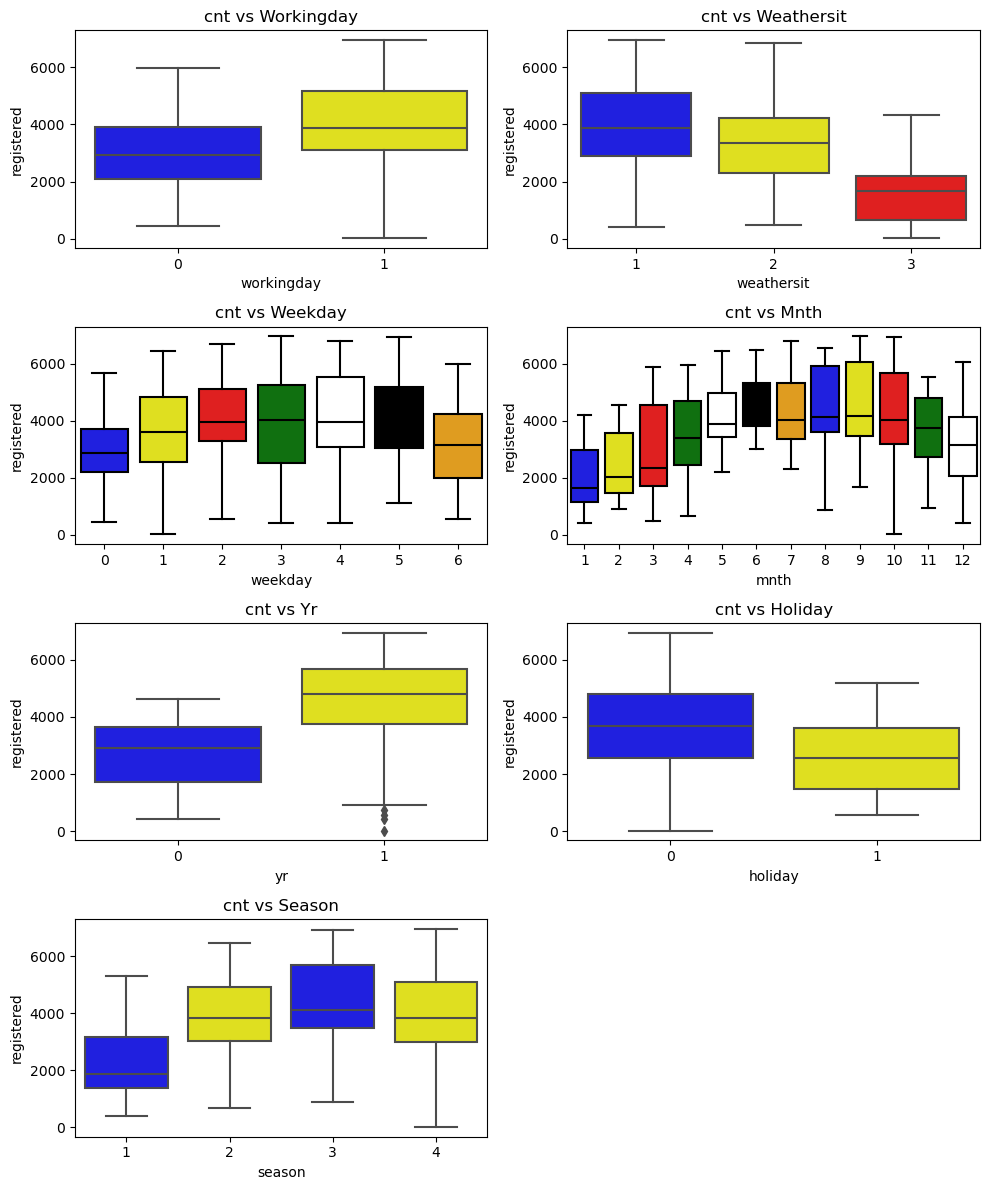

In [15]:
# Colors for each category
colors = {
    'workingday': ['blue', 'yellow'],
    'weathersit': ['blue', 'yellow','red'],
    'weekday': ['blue', 'yellow','red','green','white','black','orange'],
    'mnth': ['blue', 'yellow','red','green','white','black','orange'],
    'yr': ['blue', 'yellow'],   
    'holiday': ['blue', 'yellow'],
    'season': ['blue', 'yellow']
}

params=['workingday', 'weathersit', 'weekday', 'mnth', 'yr', 'holiday','season']

plt.figure(figsize=(10, 12))
for i, feature in enumerate(params):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=feature, y='registered', data=day, palette=colors[feature])
    plt.title(f'cnt vs {feature.capitalize()}')
    #plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

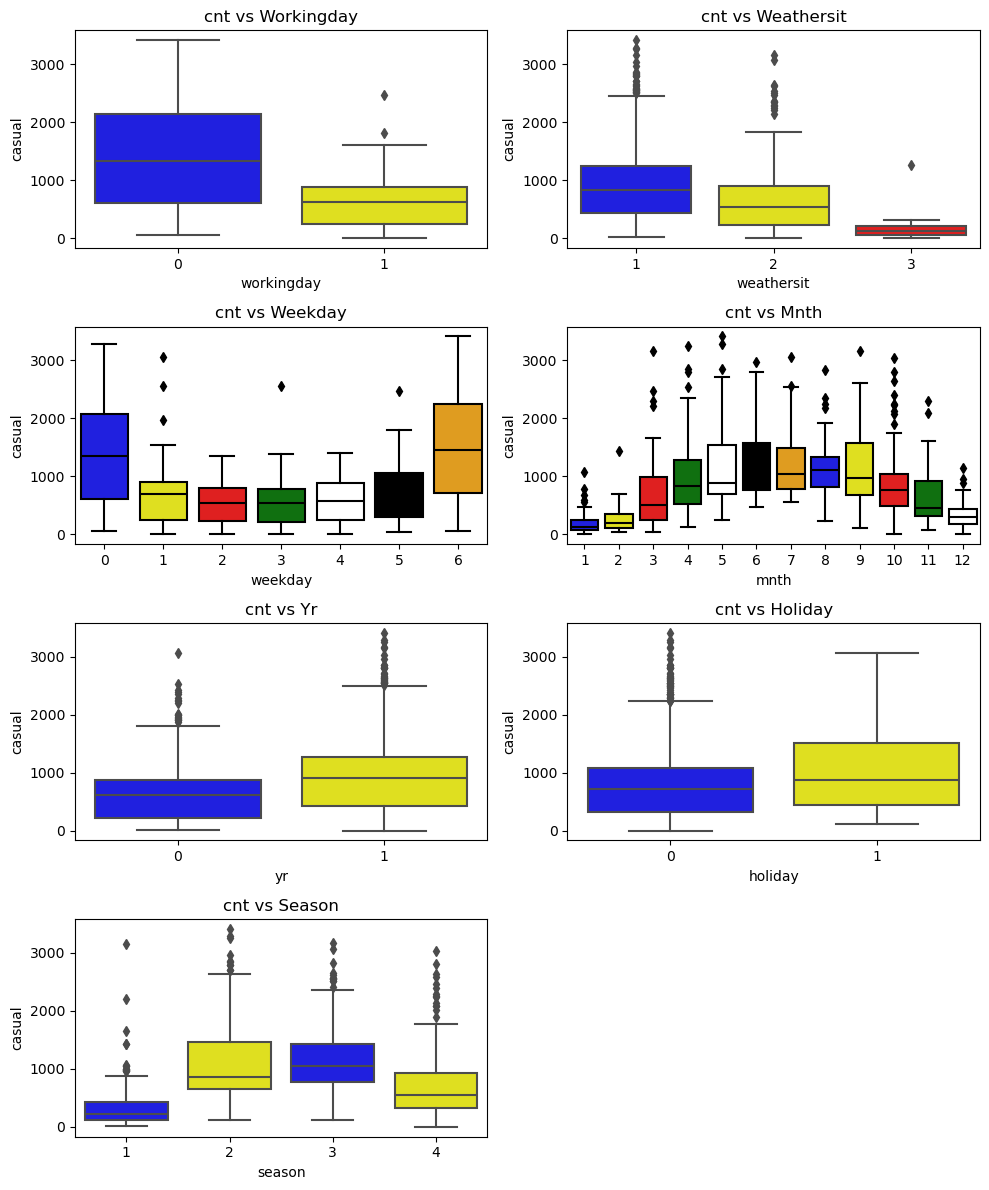

In [16]:
# Colors for each category
colors = {
    'workingday': ['blue', 'yellow'],
    'weathersit': ['blue', 'yellow','red'],
    'weekday': ['blue', 'yellow','red','green','white','black','orange'],
    'mnth': ['blue', 'yellow','red','green','white','black','orange'],
    'yr': ['blue', 'yellow'],   
    'holiday': ['blue', 'yellow'],
    'season': ['blue', 'yellow']
}

params=['workingday', 'weathersit', 'weekday', 'mnth', 'yr', 'holiday','season']

plt.figure(figsize=(10, 12))
for i, feature in enumerate(params):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=feature, y='casual', data=day, palette=colors[feature])
    plt.title(f'cnt vs {feature.capitalize()}')
    #plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Observations from Step-2b
- Categorical variables observed are Year, Month, Season, Weekday,Workingday,Holiday,Weather situation
- Except working day and week day, all other variables show good impact on the target y-variable cnt
- Given that cnt is a sum of casual and registered user count, these sub components of cnt were also plotted
- Observed an opposite behavior of the casual and registered users w.r.t "working day" and "week day", which is resulting
  in a weak relation of these two parameters to target y. Hence, we cannot ignore these parameters because if it happens to be a situation where casual to registered users usage ratio is significantly away from 0.5, then the working day and week day will show a clear impact on cnt. 
- Hence it is ideal to build 2 linear regression models, one to capture the casual user behavior & the other to capture the registered user behavior. Finally, overall demand is a sum of these 2 behaviors. However, first attempt is to build a linear regression for target y which is cnt

  

## Step 3: Data Preparation

- There are some categorical columns with multiple levels. This is an attempt to create dummy varibales from those multiple       level categorical values
- Also there are some non relevant columns in the dataset which are not features. Those columns will be deleted 

In [17]:
cleandata = day.drop(['instant','dteday','casual','registered'],axis=1)
cleandata.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [18]:
# Check the new data frame
cleandata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Dummy Variables

In [19]:
# List of dummy variables
varlist =  ['season', 'month', 'weekday', 'weathersit']

#### For each variable listed above, following steps are performed.
     1. Get Dummy for each variable column
     2. Map the column names as per Data Dictionary.
     3. Delete the original column

##### Dummies for Season

In [20]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'status'
status = pd.get_dummies(cleandata['season'],dtype=int)
status.head()

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


One out of n=4 dummy levels will be dropped as every set of n-1 dummy variables can explain the remaining nth dummy variable
- `0000` will correspond to `spring`
- `0100` will correspond to `summer`
- `0010` will correspond to `fall`
- `0001` will correspond to `winter`

In [21]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(cleandata['season'], dtype=int,drop_first = True)
status.head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [22]:
# Create a new data frame by adding the status to the cleandata
cleandata_w_dummies_1 = pd.concat([cleandata, status], axis = 1)
#Rename columns
cleandata_w_dummies_1.rename(columns={2: 'summer', 3: 'fall',4:'winter'}, inplace=True)
# Now let's see the head of our dataframe.
cleandata_w_dummies_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [23]:
# Drop 'season' as we have created the dummies for it
cleandata_w_dummies_1.drop(['season'], axis = 1, inplace = True)
cleandata_w_dummies_1.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


##### Dummies for Month

In [24]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(cleandata['mnth'], dtype=int,drop_first = True)
status.head()
# Add the results to the original housing dataframe
cleandata_w_dummies_2 = pd.concat([cleandata_w_dummies_1, status], axis = 1)

# Create the dictionary using a dictionary comprehension
month_dict = {2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

#Rename columns
cleandata_w_dummies_2.rename(columns=month_dict, inplace=True)
# Drop 'furnishingstatus' as we have created the dummies for it
cleandata_w_dummies_2.drop(['mnth'], axis = 1, inplace = True)
# Now let's see the head of our dataframe.
print(cleandata_w_dummies_2.head())
print(cleandata_w_dummies_2.columns)

   yr  holiday  weekday  workingday  weathersit       temp     atemp      hum  \
0   0        0        6           0           2  14.110847  18.18125  80.5833   
1   0        0        0           0           2  14.902598  17.68695  69.6087   
2   0        0        1           1           1   8.050924   9.47025  43.7273   
3   0        0        2           1           1   8.200000  10.60610  59.0435   
4   0        0        3           1           1   9.305237  11.46350  43.6957   

   windspeed   cnt  ...  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec  
0  10.749882   985  ...    0    0    0    0    0    0    0    0    0    0  
1  16.652113   801  ...    0    0    0    0    0    0    0    0    0    0  
2  16.636703  1349  ...    0    0    0    0    0    0    0    0    0    0  
3  10.739832  1562  ...    0    0    0    0    0    0    0    0    0    0  
4  12.522300  1600  ...    0    0    0    0    0    0    0    0    0    0  

[5 rows x 24 columns]
Index(['yr', 'holiday', 'weekday',

##### Dummies for weekday

In [25]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(cleandata['weekday'], dtype=int) #Custom dropping here. So we do drop later
status.head()
# Drop the last column
status = status.iloc[:, :-1]
# Add the results to the original housing dataframe
cleandata_w_dummies_3 = pd.concat([cleandata_w_dummies_2, status], axis = 1)
cleandata_w_dummies_3.head()
# Create the dictionary using a dictionary comprehension
week_dict = {0:'Sunday',1:"Monday",2:'Teusday',3:'Wednesday',4:'Thursday',5:'Friday'}
#Rename columns
cleandata_w_dummies_3.rename(columns=week_dict, inplace=True)
# Drop 'furnishingstatus' as we have created the dummies for it
cleandata_w_dummies_3.drop(['weekday'], axis = 1, inplace = True)
print(cleandata_w_dummies_3.columns)
# Now let's see the head of our dataframe.
print(cleandata_w_dummies_3.head())

Index(['yr', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'summer', 'fall', 'winter', 'Feb', 'Mar', 'Apr',
       'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Sunday',
       'Monday', 'Teusday', 'Wednesday', 'Thursday', 'Friday'],
      dtype='object')
   yr  holiday  workingday  weathersit       temp     atemp      hum  \
0   0        0           0           2  14.110847  18.18125  80.5833   
1   0        0           0           2  14.902598  17.68695  69.6087   
2   0        0           1           1   8.050924   9.47025  43.7273   
3   0        0           1           1   8.200000  10.60610  59.0435   
4   0        0           1           1   9.305237  11.46350  43.6957   

   windspeed   cnt  summer  ...  Sep  Oct  Nov  Dec  Sunday  Monday  Teusday  \
0  10.749882   985       0  ...    0    0    0    0       0       0        0   
1  16.652113   801       0  ...    0    0    0    0       1       0        0   
2  16.636703  13

##### Dummies for weathersit

In [26]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(cleandata['weathersit'], dtype=int,drop_first = True)
status.head()
# Add the results to the original housing dataframe
cleandata_w_dummies_4 = pd.concat([cleandata_w_dummies_3, status], axis = 1)
cleandata_w_dummies_4.head()
# Create the dictionary using a dictionary comprehension
#weather_dict = {i: f'Weather_Sit{i}' for i in range(2, 4)}
weather_dict = {2:'Mist & Cloudy',3:'Light Snow',4:'Heavy Rain'}
print(weather_dict)
#Rename columns
cleandata_w_dummies_4.rename(columns=weather_dict, inplace=True)
# Drop 'furnishingstatus' as we have created the dummies for it
cleandata_w_dummies_4.drop(['weathersit'], axis = 1, inplace = True)
# Now let's see the head of our dataframe.
print(cleandata_w_dummies_4.head())
print(cleandata_w_dummies_4.columns)

{2: 'Mist & Cloudy', 3: 'Light Snow', 4: 'Heavy Rain'}
   yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   summer  fall  ...  Nov  Dec  Sunday  Monday  Teusday  Wednesday  Thursday  \
0       0     0  ...    0    0       0       0        0          0         0   
1       0     0  ...    0    0       1       0        0          0         0   
2       0     0  ...    0    0       0       1        0          0         0   
3       0     0  ...    0    0       0       0        1          0         0   
4       0     0  ...    0    0       0       0        0          1         0   

 

In [27]:
print("Number of columns in original input data :: ",len(day.columns))
print("4 columns are removed from the input data as these are not features :: ",['instant','dteday','casual','registered'])
print("Total number of columns after adding the dummy variables to the cleaned input data :: ", len(cleandata_w_dummies_4.columns))

Number of columns in original input data ::  16
4 columns are removed from the input data as these are not features ::  ['instant', 'dteday', 'casual', 'registered']
Total number of columns after adding the dummy variables to the cleaned input data ::  30


### Observations from Step-3
- Number of columns in original input data ::  16
- 4 columns are removed from the input data as these are not features ::  ['instant', 'dteday', 'casual', 'registered']
- Total number of columns after adding the dummy variables to the cleaned input data ::  30

## Step 4: Splitting the Data into Training and Testing Sets

In [28]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(cleandata_w_dummies_4, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Rescaling the Features 

- Since the variables are in different ranges, re-scaling is performed in the below section using "Min-Max" scaling


In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

In [31]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [32]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,Nov,Dec,Sunday,Monday,Teusday,Wednesday,Thursday,Friday,Mist & Cloudy,Light Snow
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,1,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,Nov,Dec,Sunday,Monday,Teusday,Wednesday,Thursday,Friday,Mist & Cloudy,Light Snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.086275,0.084314,0.143137,0.150980,0.131373,0.158824,0.133333,0.127451,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.281045,0.278131,0.350557,0.358381,0.338139,0.365870,0.340268,0.333805,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


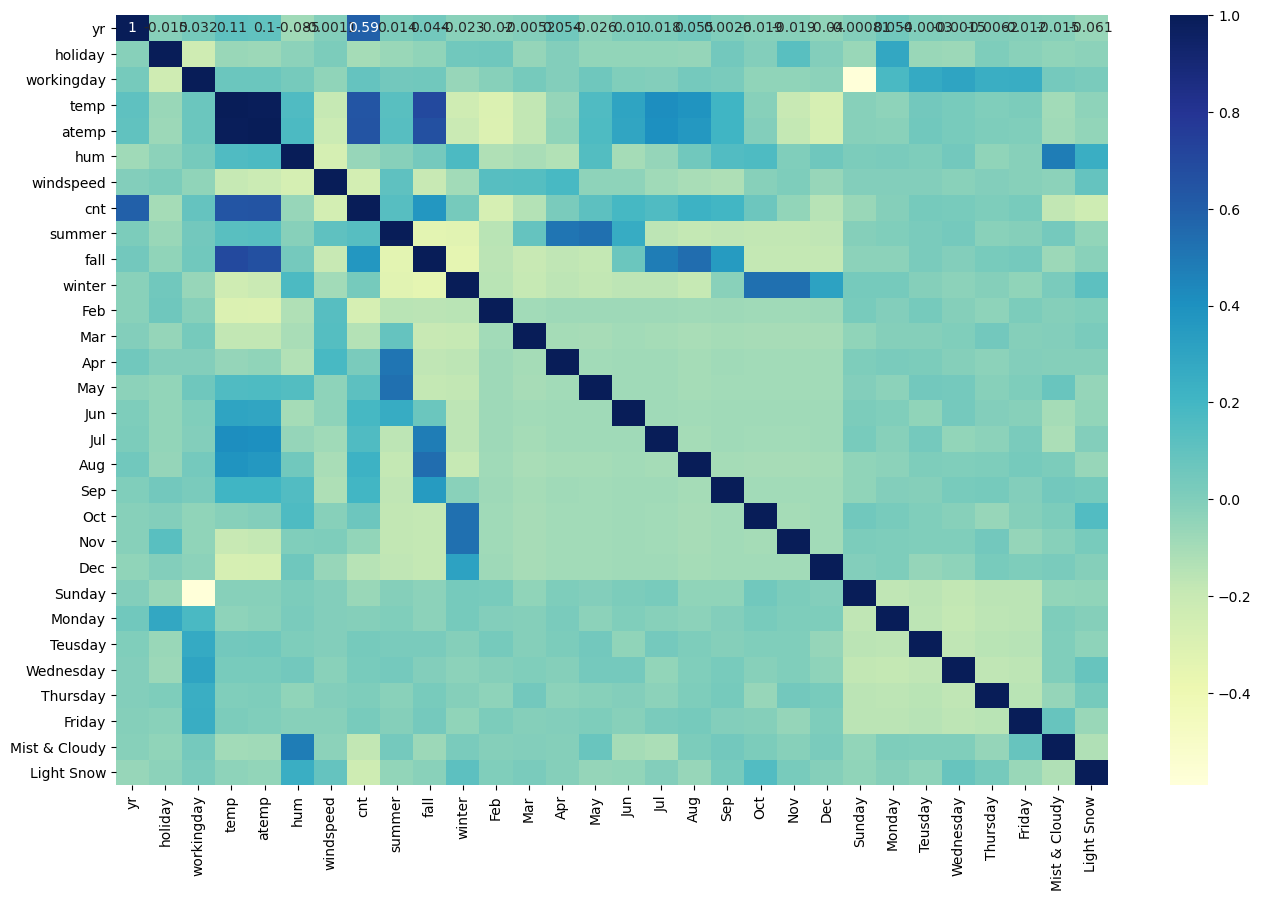

In [34]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Observations from Step-4
   - After rescaling, all parameters are now within 0 to 1
   - There could be a strong relation between Temp and aTemp
   - Fair relation exists between "Fall" and "Temp", "cnt" and "Temp", "cnt" and "Fall"
   - Seasons are correlated to months. Example summer has good correlation with "April" and "May" months. Winter to "Oct & Nov"
   - Workingday is strongly INVERSELY correlated to Sunday as a white patch can be observed in above heat map. 
   - Mist and cloudy is correlated to humidity 
   - All these dependecies can be taken care using "Variance Inflation Factor (VIF)" and "Recursive Feature Elimination RFE" to finalize on variable selection for model building

### Dividing into X and Y sets for the model building

In [35]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,Nov,Dec,Sunday,Monday,Teusday,Wednesday,Thursday,Friday,Mist & Cloudy,Light Snow
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,1,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,1,0


In [36]:
y_train = df_train.pop('cnt')
X_train = df_train
print(X_train.columns)
print(y_train.name)
print("===========")
X_train.info()

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'summer', 'fall', 'winter', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Sunday', 'Monday', 'Teusday',
       'Wednesday', 'Thursday', 'Friday', 'Mist & Cloudy', 'Light Snow'],
      dtype='object')
cnt
<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             510 non-null    int64  
 1   holiday        510 non-null    int64  
 2   workingday     510 non-null    int64  
 3   temp           510 non-null    float64
 4   atemp          510 non-null    float64
 5   hum            510 non-null    float64
 6   windspeed      510 non-null    float64
 7   summer         510 non-null    int32  
 8   fall           510 non-null    int32  
 9   winter         510 non-null    int32  
 10  Feb            510 non-null    int32  
 1

## Step 5: Building a linear regression model using "Statsmodels" package

### 5a Linear regression with 1 variable

In [37]:
def get_equation(lr_model):
    # Extract parameters
    params = lr_model.params
    intercept = params['const']
    coefficients = params[1:]
    
    # Create the equation
    equation = f"Y = {intercept:.2f}"
    for feature, coef in coefficients.items():
        equation += f" + {coef:.2f} * {feature}"
    return equation

In [38]:
import statsmodels.api as sm
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])
# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()
# Check the parameters obtained
lr_1.params
eq_1 = get_equation(lr_1)
print("Linear regression equation is :: ",eq_1)

Linear regression equation is ::  Y = 0.17 + 0.64 * temp


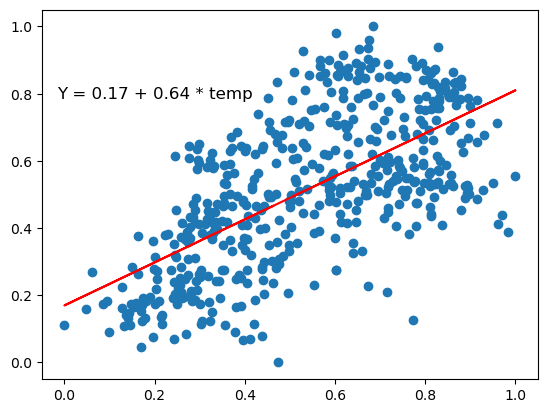

In [39]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], (lr_1.params[0]) + (lr_1.params[1])*X_train_lm.iloc[:, 1], 'r')
plt.text(0.2, 0.8, eq_1, fontsize=12, ha='center', va='center', color='black')
plt.show()

In [40]:
# Print a summary of the linear regression model obtained
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           5.80e-61
Time:                        23:52:29   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

In [41]:
print("Regression equation is :: ")
display_markdown_content(eq_1)

Regression equation is :: 


**Y = 0.17 + 0.64 * temp**

### Observations from Step-5a
- R2 is 41% which means "Temp" parameter alone could explain 41% variance in the target y cnt
- P = 0 ==> chosen x variable is significant as the null hypothesis (x is insignificant) failed
- Lower value of Prob (F-statistic) indicate that the model is significant

### 5b Adding all the variables to the model

Adding all the continuous and categorical x values to train the model to understand the maximum R2 possible

In [42]:
# Passing all the columns of the dataframe
X_train_lm = X_train
# Build a linear model
# Add a constant
X_train_lm = sm.add_constant(X_train_lm)
# Create a first fitted model
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

eq_2 = get_equation(lr_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Tue, 06 Aug 2024   Prob (F-statistic):          8.42e-181
Time:                        23:52:29   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2302      0.029      7.812

In [43]:
print("Regression equation is :: ")
display_markdown_content(eq_2)

Regression equation is :: 


**Y = 0.23 + 0.23 * yr + -0.08 * holiday + 0.00 * workingday + 0.40 * temp + 0.05 * atemp + -0.15 * hum + -0.18 * windspeed + 0.09 * summer + 0.05 * fall + 0.15 * winter + 0.03 * Feb + 0.06 * Mar + 0.06 * Apr + 0.09 * May + 0.06 * Jun + 0.02 * Jul + 0.08 * Aug + 0.14 * Sep + 0.07 * Oct + 0.02 * Nov + 0.02 * Dec + -0.05 * Sunday + -0.03 * Monday + -0.02 * Teusday + -0.01 * Wednesday + -0.01 * Thursday + -0.00 * Friday + -0.06 * Mist & Cloudy + -0.26 * Light Snow**

### Observations from Step-5b
- R2 is 85% after adding all the parameters
- Observing the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).


### 5c Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [44]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

def get_vif(df):
    if "const" in df.columns.tolist():df=df.drop(['const'],axis=1)
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

get_vif(X_train)

,Features,VIF
24,Wednesday,inf
2,workingday,inf
23,Teusday,inf
22,Monday,inf
26,Friday,inf
25,Thursday,inf
1,holiday,inf
3,temp,447.70
4,atemp,383.50
5,hum,21.80


A VIF of 5% is equal to an R2 of 80%. So, below are few steps to manually eliminate the parameters which are related to rest of parameters with R2>= 80%

### Dropping the variable and updating the model

Dropping the variables with very high VIF values, one at a time

In [46]:
seasons=['fall','winter','summer']
days = ['Sunday','Monday','Teusday','Wednesday','Thursday','Friday']
months = ['Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
weather = ['Mist & Cloudy','Light Snow']

In [47]:
# Dropping highly correlated variables and insignificant variables
rmc = ['workingday','atemp','temp','hum']+days+seasons  # rmc ==> remove columns 
X_train_lm_1 = X_train.drop(rmc,axis=1)
# Build a linear model
# Add a constant
X_train_lm_1 = sm.add_constant(X_train_lm_1)
# Create a first fitted model
lr_all = sm.OLS(y_train, X_train_lm_1).fit()
# Print the summary of the model
print(lr_all.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     124.7
Date:                Tue, 06 Aug 2024   Prob (F-statistic):          1.23e-161
Time:                        23:52:30   Log-Likelihood:                 451.38
No. Observations:                 510   AIC:                            -868.8
Df Residuals:                     493   BIC:                            -796.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2217      0.019     11.766

In [48]:
# Calculate the VIFs again for the new model
get_vif(X_train_lm_1)

,Features,VIF
2,windspeed,3.92
0,yr,1.94
14,Mist & Cloudy,1.51
4,Mar,1.50
5,Apr,1.48
3,Feb,1.35
12,Nov,1.35
11,Oct,1.34
9,Aug,1.31
6,May,1.30


In [49]:
eq_all = get_equation(lr_all)
print("Regression equation is :: ")
display_markdown_content(eq_all)

Regression equation is :: 


**Y = 0.22 + 0.25 * yr + -0.08 * holiday + -0.19 * windspeed + 0.07 * Feb + 0.19 * Mar + 0.28 * Apr + 0.36 * May + 0.38 * Jun + 0.35 * Jul + 0.38 * Aug + 0.42 * Sep + 0.35 * Oct + 0.25 * Nov + 0.17 * Dec + -0.08 * Mist & Cloudy + -0.29 * Light Snow**

### Observations from Step-5c
- P values for all the selected x params are 0 or very close to 0 indicating their significance for the model
- VIF for all the final list of parameters are < 5 indicating that there is no fit > 80% R2 b/w any of these parameters
- Parameters are first categorized to buckets as seasons, days, months, weather and plugged in and out as a list of parameters instead of partially selecting and eliminating parameters from a category.

### 6 Recursive Feature Elimination RFE

### 6a Using RFE to select the features
Below section is an attempt to build the regression model using RFE Recursive Feature Elimination from scikit learn package.

In [50]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [51]:
# Running RFE with the output number of the variable equal to 10
# Initialize the model & fit
lm = LinearRegression()
lm.fit(X_train, y_train)

# Initialize RFE with the model and the number of features to select
rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(X_train,y_train)

In [52]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 19),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', False, 5),
 ('winter', True, 1),
 ('Feb', False, 11),
 ('Mar', False, 6),
 ('Apr', False, 8),
 ('May', False, 7),
 ('Jun', False, 9),
 ('Jul', False, 12),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', False, 4),
 ('Nov', False, 13),
 ('Dec', False, 14),
 ('Sunday', False, 3),
 ('Monday', False, 15),
 ('Teusday', False, 16),
 ('Wednesday', False, 18),
 ('Thursday', False, 17),
 ('Friday', False, 20),
 ('Mist & Cloudy', False, 2),
 ('Light Snow', True, 1)]

In [53]:
col = X_train.columns[rfe.support_]
print("X columns supported by RFE")
col

X columns supported by RFE


Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'winter', 'Aug',
       'Sep', 'Light Snow'],
      dtype='object')

In [54]:
print("X columns NOT supported by RFE")
X_train.columns[~rfe.support_]

X columns NOT supported by RFE


Index(['workingday', 'atemp', 'fall', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Oct', 'Nov', 'Dec', 'Sunday', 'Monday', 'Teusday', 'Wednesday',
       'Thursday', 'Friday', 'Mist & Cloudy'],
      dtype='object')

In [55]:
get_vif(X_train[col])

,Features,VIF
3,hum,10.01
2,temp,8.51
4,windspeed,3.57
0,yr,2.01
5,summer,1.81
6,winter,1.74
7,Aug,1.57
8,Sep,1.30
9,Light Snow,1.09
1,holiday,1.04


In [56]:
# Accessing the coefficients and intercept
coefficients = lm.coef_
intercept = lm.intercept_
print(coefficients)
print(intercept)

[ 0.2322076  -0.08134545  0.00492735  0.40132173  0.05062751 -0.15181212
 -0.18438787  0.08679582  0.04858014  0.15396753  0.03038946  0.06385346
  0.06256549  0.08725656  0.06086195  0.02328882  0.0786415   0.14437123
  0.07026041  0.02078279  0.0169937  -0.05453262 -0.02552702 -0.0233333
 -0.00975783 -0.01377488 -0.00402507 -0.06103021 -0.25669709]
0.23015026749255818


### Observations from Step 6a
- RFE shortlisted 10 parameters as significant parameters for model development
- humidity and temperature are observed to have VIF > 5 i.e there is scope to eliminate these parameters from model

### 6b Building model using statsmodel with RFE shortlisted parameters

In [57]:
# Build a linear model
X_train_lm_2 = X_train[col]
# Add a constant
X_train_lm_2 = sm.add_constant(X_train_lm_2)
# Create a first fitted model
lr_2 = sm.OLS(y_train, X_train_lm_2).fit()
# Print the summary of the model
print(lr_2.summary())
get_vif(X_train_lm_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Tue, 06 Aug 2024   Prob (F-statistic):          1.16e-186
Time:                        23:52:30   Log-Likelihood:                 494.69
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2762      0.026     10.565      0.0

,Features,VIF
3,hum,10.01
2,temp,8.51
4,windspeed,3.57
0,yr,2.01
5,summer,1.81
6,winter,1.74
7,Aug,1.57
8,Sep,1.30
9,Light Snow,1.09
1,holiday,1.04


In [58]:
X_train_lm_3=X_train_lm_2.drop(['hum'],axis=1)
# Add a constant
X_train_lm_3 = sm.add_constant(X_train_lm_3)
# Create a first fitted model
lr_3 = sm.OLS(y_train, X_train_lm_3).fit()
# Print the summary of the model
print(lr_3.summary())
print(X_train_lm_3.columns)
get_vif(X_train_lm_3)
final_x_params = X_train_lm_3.columns.tolist()
print("Final set of x parameters are :: ",final_x_params)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     229.8
Date:                Tue, 06 Aug 2024   Prob (F-statistic):          2.24e-171
Time:                        23:52:30   Log-Likelihood:                 455.77
No. Observations:                 510   AIC:                            -891.5
Df Residuals:                     500   BIC:                            -849.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0897      0.017      5.151      0.0

In [59]:
eq_final = get_equation(lr_3)
print("Final Regression equation is :: ")
display_markdown_content(eq_final)

Final Regression equation is :: 


**Y = 0.09 + 0.23 * yr + -0.09 * holiday + 0.55 * temp + -0.14 * windspeed + 0.09 * summer + 0.13 * winter + 0.04 * Aug + 0.10 * Sep + -0.25 * Light Snow**

### Observations from Step-6b
- RFE shortlisted parameters resulted in 83% R2 model. It saved a lot of time in shortlisting the parameters
- Since the VIF of these shortlisted parameters is in the range 0 to 10, an attempt to reduce the number of independent variables was done
- Just by removing humidity, the model R2 has gone down from 83% to 80%. However, the p value of all the remaining parameters is now very close to 0 which indicates that these are significant parameters
- Also the VIF of final set of parameters ranges between 1 to 5, which means that these are fairly independent / weakly dependent parameter
- Finally the Prob (F-statistic) is 2.24e-171 which is very close to 0. This indicates that the model is significant

### Checking the impact of categorical variables

In [60]:
X_train_lm_4=X_train_lm_3.drop(['yr'],axis=1)
# Add a constant
X_train_lm_4 = sm.add_constant(X_train_lm_4)
# Create a first fitted model
lr_4 = sm.OLS(y_train, X_train_lm_4).fit()
# Print the summary of the model
print(lr_4.summary())
print(X_train_lm_4.columns)
print(get_vif(X_train_lm_4))
cont_x_params = X_train_lm_4.columns.tolist()
print("After dropping categorical, x params are :: ",cont_x_params)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     73.22
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           2.43e-79
Time:                        23:52:30   Log-Likelihood:                 235.97
No. Observations:                 510   AIC:                            -453.9
Df Residuals:                     501   BIC:                            -415.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1721      0.026      6.539      0.0

In [61]:
X_train_lm_4=X_train_lm_3.drop(['Aug','Sep','Light Snow','holiday','yr','summer','winter'],axis=1)
# Add a constant
X_train_lm_4 = sm.add_constant(X_train_lm_4)
# Create a first fitted model
lr_4 = sm.OLS(y_train, X_train_lm_4).fit()
# Print the summary of the model
print(lr_4.summary())
print(X_train_lm_4.columns)
print(get_vif(X_train_lm_4))
cont_x_params = X_train_lm_4.columns.tolist()
print(cont_x_params)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     193.2
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           4.26e-63
Time:                        23:52:30   Log-Likelihood:                 182.97
No. Observations:                 510   AIC:                            -359.9
Df Residuals:                     507   BIC:                            -347.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2422      0.026      9.188      0.0

## Step 7: Residual Analysis of the train data

Error terms being normally distributed is one of the major assumptions of linear regression. Below section is to verify the assumption by plotting the histogram of the error terms.

In [62]:
y_train_lm_3 = lr_3.predict(X_train_lm_3)
residuals = lr_3.resid#y_train - y_train_lm_3
fitted_values = lr_3.fittedvalues

Text(0.5, 0, 'Errors')

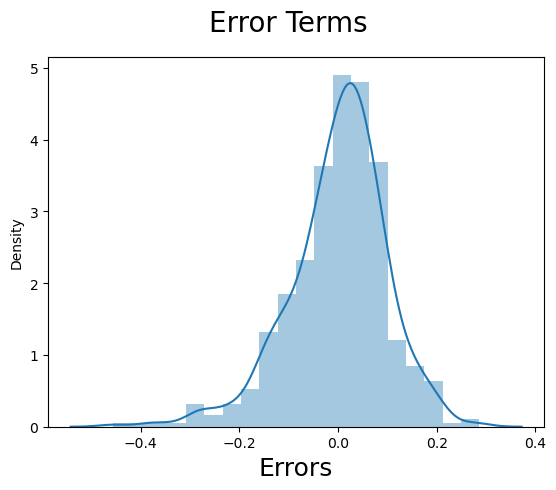

In [63]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(residuals, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

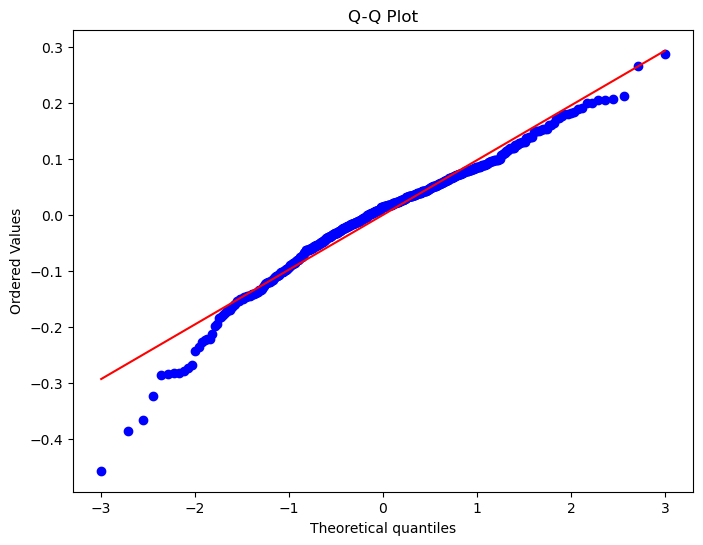

In [64]:
# Q-Q plot
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

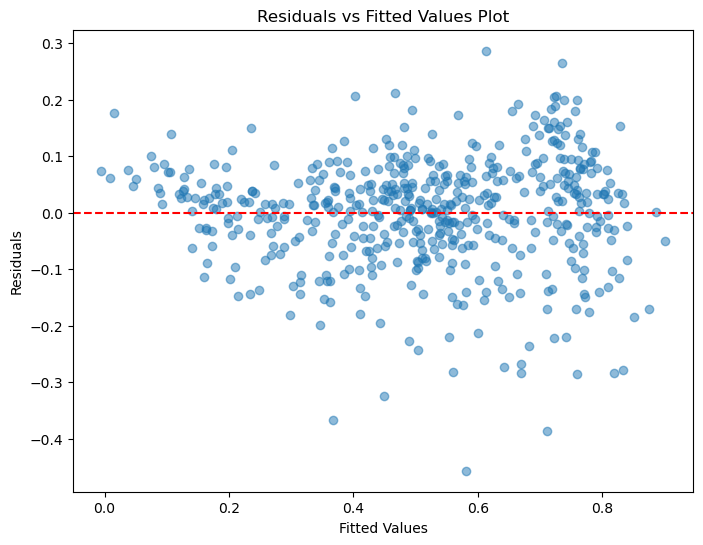

In [65]:
# To check homoscedasticity (constant variance of residuals) 
# Plot residuals vs fitted values
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values Plot')
plt.show()

### Observations from Step-7
- Clearly the error data set for the train data is observed to follow normal distribution. Also, there is no trend of error data w.r.t fitted values. Hence the linear regression assumption is verified

## Step 8: Making Predictions Using the Final Model

With the best model that was fitted above (lr_3), predictions are done on the test dataset in the section below

#### Applying the scaling on the test sets

In [66]:
# scaler.transform is used instead of scaler.fit_transform. This is to ensure that the model donot learn anything from the test data.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [67]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,Nov,Dec,Sunday,Monday,Teusday,Wednesday,Thursday,Friday,Mist & Cloudy,Light Snow
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,...,0.073059,0.086758,0.146119,0.127854,0.164384,0.100457,0.164384,0.178082,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,...,0.260830,0.282125,0.354034,0.334692,0.371472,0.301297,0.371472,0.383458,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [68]:
y_test = df_test.pop('cnt')
X_test = df_test

In [69]:
# Adding constant variable to test dataframe
X_test_lm3 = sm.add_constant(X_test)

In [70]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_lm3 = X_test_lm3[final_x_params]

In [71]:
# Making predictions using the fourth model

y_test_pred_lm3 = lr_3.predict(X_test_lm3)

Text(0.5, 0, 'Errors')

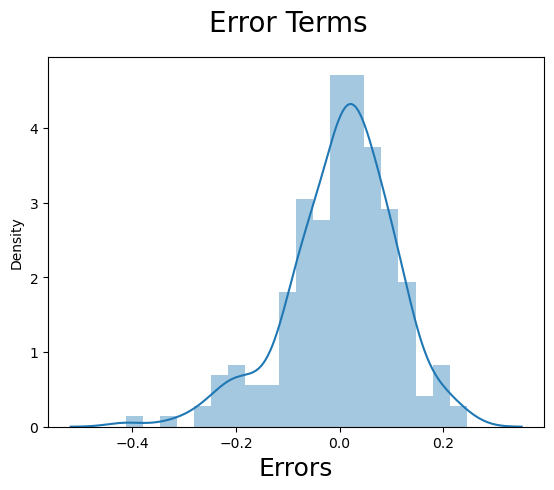

In [72]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_test_pred_lm3), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

### Observations from Step-8
- Scaling is performed without fit. This is why we see that some of the columns have range outside of [0 1]. 
- Error on ytest also follows normal distribution same as that of train set

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_test_pred_lm3')

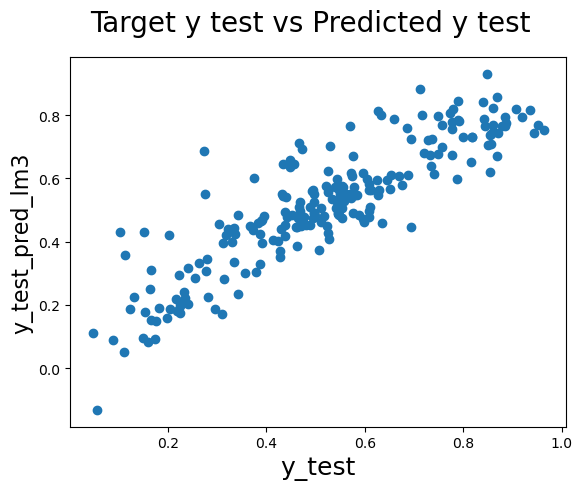

In [73]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred_lm3)
fig.suptitle('Target y test vs Predicted y test', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred_lm3', fontsize = 16)      

In [74]:
# Calculate R-squared
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_test_pred_lm3)
print("R2 on the test data is :: ",r_squared)

R2 on the test data is ::  0.7736064262516151


### Observations from Step-9
- R2 on the test data is 77% which is very close to R2 on train data which is 80.5%
- Hence the fit is generalzing well across the population

In [85]:
import matplotlib as m
import sklearn as s
import sys


In [95]:
print("Python version :: ",sys.version)
print("\nLibraries used in the environment are :: ")
print("Numpy           :: ",np.__version__)
print("Pandas          :: ",pd.__version__)
print("Matplotlib      :: ",m.__version__)
print("Seaborn         :: ",sns.__version__)
print("Sklearn         :: ",s.__version__)
print("Statsmodels     :: ",sm.__version__)

Python version ::  3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]

Libraries used in the environment are :: 
Numpy           ::  1.26.4
Pandas          ::  2.1.4
Matplotlib      ::  3.8.0
Seaborn         ::  0.11.0
Sklearn         ::  1.2.2
Statsmodels     ::  0.14.0
